# Seattle Library - Datenanalyse


Datasets:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

API-dokumenation:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [1]:
import urllib.request
import pandas as pd

## Checkout-Daten über die API beziehen und als CSV-Datei speichern

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7fe4b4478690>)

## In einen DataFrame laden und analysieren

In [3]:
checkouts_df = pd.read_csv(checkout_file)

In [4]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


In [5]:
checkouts_df.shape

(10000, 12)

In [6]:
# Result: Seem like we only have enties from December - maybe need to further increase the data set and then subsample
checkouts_df["checkoutmonth"].unique()

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12])

In [7]:
checkouts_df["checkouts"].max()

540

In [8]:
checkouts_df["checkouts"].min()

1

In [9]:
checkouts_df["checkouts"].median()

1.0

In [10]:
checkouts_df["checkouts"].mean()

3.3392

In [11]:
checkouts_df["usageclass"].unique()

array(['Digital', 'Physical'], dtype=object)

In [12]:
checkouts_df["materialtype"].unique()

array(['EBOOK', 'TELEVISION', 'SOUNDDISC', 'BOOK', 'AUDIOBOOK', 'COMIC',
       'MOVIE', 'SONG', 'MUSIC', 'MAGAZINE', 'VIDEODISC', 'SOUNDREC',
       'SOUNDDISC, VIDEODISC', 'CR', 'LARGEPRINT', 'ER, SOUNDDISC',
       'ATLAS', 'ER', 'MAP', 'VIDEOCASS, VIDEODISC', 'REGPRINT', 'VIDEO',
       'SOUNDCASS', 'ER, VIDEODISC'], dtype=object)

In [13]:
checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
9,Digital,OverDrive,AUDIOBOOK,2018,2,1,Cleopatra (Unabridged),NaN,H. Rider Haggard,"Fiction, Literature","Blackstone Audio, Inc.",2008
12,Digital,OverDrive,AUDIOBOOK,2018,2,20,Matilda (Unabridged),NaN,Roald Dahl,"Fantasy, Juvenile Fiction",Books on Tape,2014
14,Digital,OverDrive,AUDIOBOOK,2018,2,4,The Power of Sleep (Unabridged),NaN,Kelly Howell,"Nonfiction, Self-Improvement",Books on Tape,2008
16,Digital,OverDrive,AUDIOBOOK,2018,2,3,Phantom Instinct (Unabridged),NaN,Meg Gardiner,"Fiction, Mystery","Blackstone Audio, Inc.",2014
39,Digital,OverDrive,AUDIOBOOK,2018,4,1,The Vaults (Unabridged),NaN,Toby Ball,"Fiction, Mystery",Iambik Audio,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
9938,Digital,OverDrive,AUDIOBOOK,2018,1,7,Legacy of Ashes: The History of the CIA (unabr...,NaN,Tim Weiner,"History, Nonfiction","Blackstone Audio, Inc.",2007
9939,Digital,OverDrive,AUDIOBOOK,2018,1,15,Cutting For Stone: A Novel (unabridged) (Unabr...,NaN,Abraham Verghese,"Fiction, Literature",Books on Tape,2009
9960,Digital,OverDrive,AUDIOBOOK,2018,1,3,Diana: Her True Story in Her Own Words (unabri...,NaN,Andrew Morton,"Biography & Autobiography, Nonfiction",Simon & Schuster - All Library,2017
9963,Digital,OverDrive,AUDIOBOOK,2018,1,1,"Forever: The Wolves of Mercy Falls Trilogy, Bo...",NaN,Maggie Stiefvater,"Fantasy, Romance, Young Adult Fiction",Scholastic Inc. Audiobooks,2011


In [14]:
checkouts_audiobooks_df = checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

In [15]:
checkouts_audiobooks_df.shape

(857, 12)

In [16]:
checkouts_audiobooks_df.to_csv("checkout_audio_books_only.csv")

In [17]:
checkouts_audiobooks_df.to_excel("checkout_audio_books_only.xlsx")

In [18]:
checkouts_df["materialtype"].value_counts()

BOOK                    4268
EBOOK                   2084
AUDIOBOOK                857
SOUNDDISC                839
VIDEODISC                806
SONG                     707
MUSIC                    139
MOVIE                     94
TELEVISION                85
COMIC                     62
SOUNDDISC, VIDEODISC      10
MAGAZINE                  10
SOUNDREC                   8
REGPRINT                   7
VIDEO                      5
CR                         4
ER, SOUNDDISC              3
ER                         3
MAP                        3
ATLAS                      2
LARGEPRINT                 1
VIDEOCASS, VIDEODISC       1
SOUNDCASS                  1
ER, VIDEODISC              1
Name: materialtype, dtype: int64

In [19]:
%matplotlib inline

<AxesSubplot: >

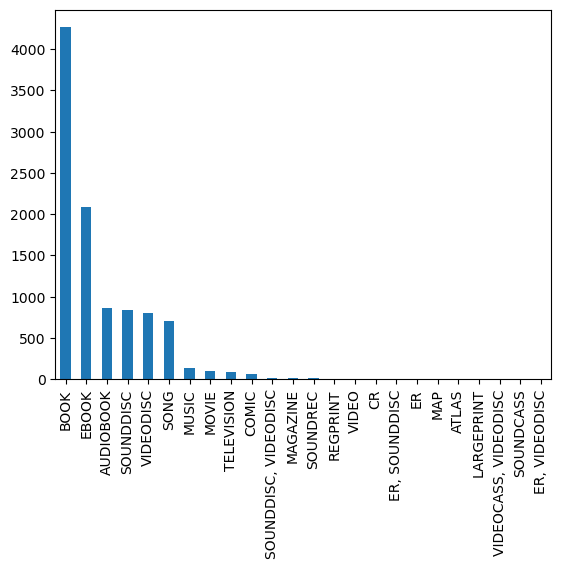

In [20]:
checkouts_df["materialtype"].value_counts().plot(kind="bar")

<AxesSubplot: >

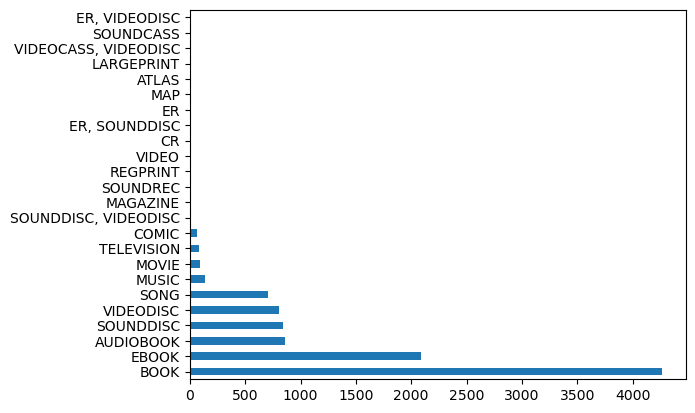

In [21]:
checkouts_df["materialtype"].value_counts().plot(kind="barh")

<AxesSubplot: >

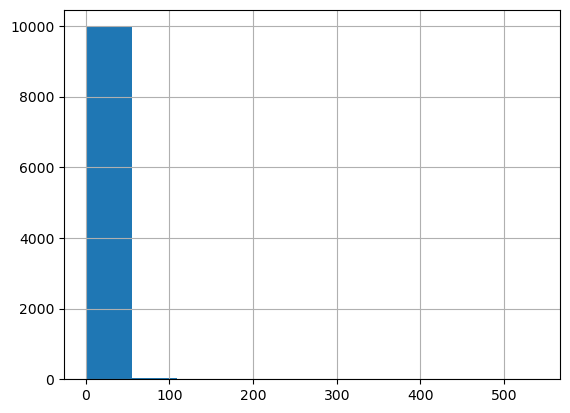

In [22]:
checkouts_df["checkouts"].hist()

<AxesSubplot: >

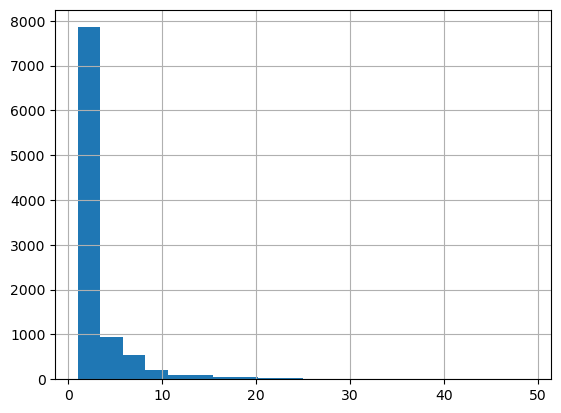

In [23]:
checkouts_df[checkouts_df["checkouts"] < 50 ]["checkouts"].hist(bins=20)